<a href="https://colab.research.google.com/github/n-wes/churn_modeling/blob/master/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

In [4]:
from typing import *
import cv2 # pip install opencv-python
import os 
import glob

def get_list_of_imgs(folder_path: str) -> List:
    data_path = os.path.join(folder_path,'*g') 
    files = glob.glob(data_path) 
    list_of_imgs = [] 
    for f1 in files: 
        img = cv2.imread(f1)
        list_of_imgs.append(img)
    return list_of_imgs

list_of_cat_imgs = get_list_of_imgs('./cats')
list_of_dog_imgs = get_list_of_imgs('./dogs')

print(f'Loaded {len(list_of_cat_imgs)} images of cats')
print(f'Loaded {len(list_of_cat_imgs)} images of dogs')

Loaded 500 images of cats
Loaded 500 images of dogs


Some commentary

In [5]:
import numpy as np

def list_to_numpy_array(img):
    return np.asarray(img, dtype=np.float32)

def grayscale(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.144])

def grayscale_imgs(list_of_imgs):
    return [list_to_numpy_array(grayscale(img)) for img in list_of_imgs]

list_of_cat_imgs = grayscale_imgs(list_of_cat_imgs)
list_of_dog_imgs = grayscale_imgs(list_of_dog_imgs)

Some commentary

In [6]:
import matplotlib.pyplot as plt

def plot_gallery(images, title, n_row = 3, n_col = 6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    print(title)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

Gallery of Cats


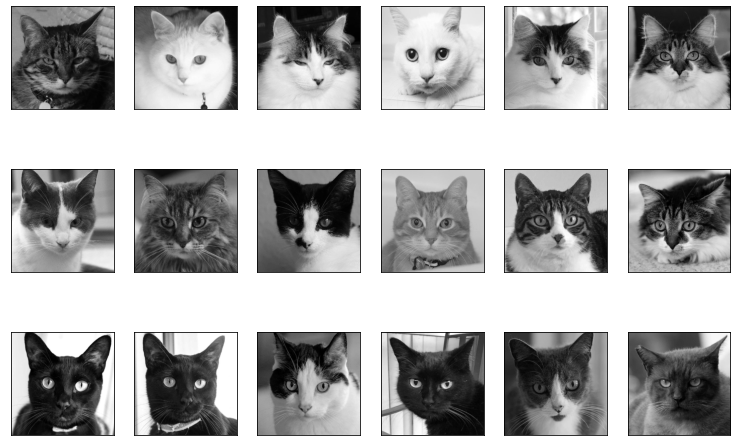

In [7]:
plot_gallery(list_of_cat_imgs, 'Gallery of Cats')

Gallery of Dogs


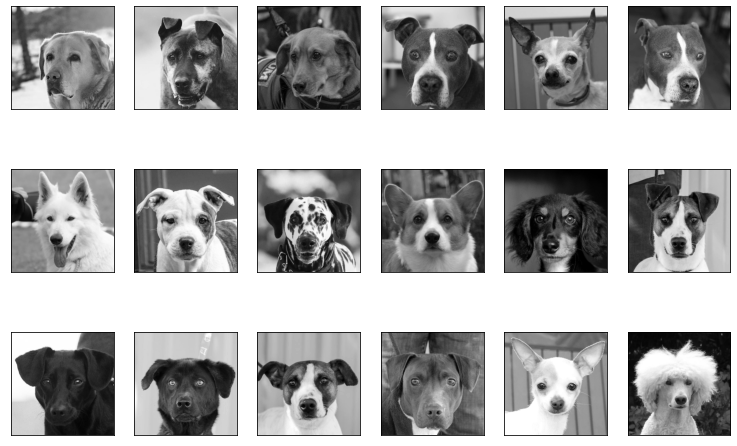

In [8]:
plot_gallery(list_of_dog_imgs, 'Gallery of Dogs')

In [9]:
df_cat = pd.DataFrame.from_records(list_of_cat_images)
df_dog = pd.DataFrame.from_records(list_of_dog_images)

NameError: name 'pd' is not defined

In [ ]:
import seaborn as sns

df_filtered = df.drop(columns=['RowNumber', 'CustomerId', 'Surname']) # drop attributes not related to Exited
df_one_hot_encoded = pd.get_dummies(df_filtered, columns=['Geography', 'Gender']) # one hot encode country

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_one_hot_encoded), columns=df_one_hot_encoded.columns)

f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df_scaled.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True)
plt.title('Correlation Matrix')
plt.show()

As seen from the above heatmap:
* High positive correlation exists between `Exits` and
    * `Age`
    * if the customer is from `Germany`
    * `Balance`
    * if the customer is `Female`
    

* High negative correlation exists between `Exits` and
    * if the member is `Active`
    
Therefore, it is worth further exploring the correlational relationshipes between our target variable `Exit` and its previously-mentioned predictor variables.

Specifically, we will investigate:
* Just how much of a factor does being German play into our statistical outcome of whether or not a customer has exited his/her bank?
* Does being an active member of a bank mean that a customer is more likely to keep his/her account, and if so, by how much margin from those who are classified as inactive?
* Just how is a customer's age and gender inter-related in terms of his/her exit from the bank?

In [10]:
def generate_pie_exited(country):
    num_closed_france = len(df[(df.Geography == country) & (df.Exited == 1)])
    num_france = len(df[df.Geography == country])
    print(round(num_closed_france * 100 / num_france, 3))
    plt.title('Exited Customers in ' + country)
    plt.pie(
        [num_france - num_closed_france, num_closed_france],
        autopct = '%1.1f%%',
        colors = ['#3498DB', '#F5B041'] # sky blue, orange
    )
    plt.legend(['Kept', 'Closed'])
    plt.show()
    
generate_pie_exited('Germany')
generate_pie_exited('France')
generate_pie_exited('Spain')

NameError: name 'df' is not defined

The above pie charts confirm our suspicion as mentioned from our heat map analysis that German customers tend to close their accounts more so than French and Spanish customers. Percentage-wise, German customers exit their accounts at approxiately twice the rate than that of non-German customers.

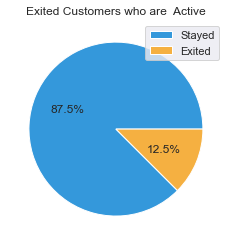

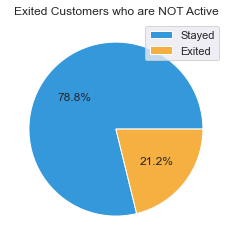

In [319]:
def filter_by_row_val(data_frame, attr, val):
    return data_frame[data_frame[attr] == val]

def gen_pie_exited_active(is_active):
    title = 'Exited Customers who are '
    if is_active == 0: title += 'NOT'
    title += ' Active'
    plt.title(title)
    
    df_copy = df.copy()
    df_filtered = filter_by_row_val(df_copy, 'IsActiveMember', is_active)
    tot = len(df_filtered)
    df_filtered_exited = filter_by_row_val(df_filtered, 'Exited', 1)
    num_exited = len(df_filtered_exited)

    plt.pie(
        [tot, num_exited],
        autopct = '%1.1f%%',
        colors = ['#3498DB', '#F5B041'] # sky blue, orange
    )
    plt.legend(['Stayed', 'Exited'])
    plt.show()

gen_pie_exited_active(1)
gen_pie_exited_active(0)

As for how whether or not a customer is an active member plays a part into his/her outcome of having exited the bank, the above graphs show that a larger portion of customersr who are considered a not active member within the bank tend to close their accounts more so than those who are considered active. Intuitively speaking, this finding makes sense since members who are active within a bank may interact with their account more than those who are not, suggesting that the accounts is more useful to them, hence why it would be more useful for active members to keep their accounts rather than to close them. 

By the same token, the converse could be true for non-active members of a bank. Since they may not interact with their account on a regular basis, to these individuals, it would make less sense for them to keep their accounts open than to close them, especially if there is some sort of charge related to keeping their accounts open. 

Although the surrounding incentives and costs related to keeping one's bank account open remains unknown and the precise definition of what it means for a customer to be considered an active member in the first place evades our understanding from the Churn Modeling dataset, the findings from the pie charts above align with our expectations for how a customer's activity and his/her exit from a bank should be correlated.

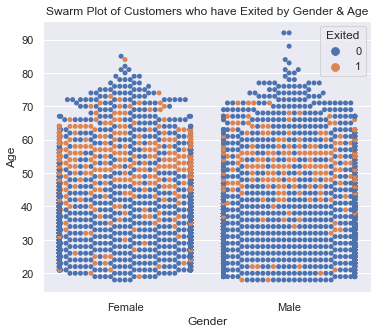

In [331]:
# this swarm plot takes a long time

plt.subplots(figsize=(20, 5))
plt.subplot(1,3,3)
sns.swarmplot(x="Gender", y="Age", hue="Exited", data=df)
plt.title('Swarm Plot of Customers who have Exited by Gender & Age')
plt.show()

Investigating further our earlier findings from our heat map about the correlation between age, gender, and a customer's closing of his/her account, we can see through our swarm plot the age groups of customers who have exited their banks and how the distribution of these age groups differ by gender.

Specifically, this swarm plot suggests that
* for males, customers who exit their banks tend to fall within a narrower age range between 45 and 60
* for females, customers who exit their banks tend to fall within a wider age range between 40 and 65
* for both genders, most of their exited customers tend to fall within the age range between 45 and 60